In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

**Read Data**

In [2]:
bat = pd.read_csv(r'./bat_stats_clean.csv')
bowl= pd.read_csv(r'./bowl_stats_clean.csv')
field = pd.read_csv(r'./field_stats_clean.csv')
wik = pd.read_csv(r'./wik_stats_clean.csv')

#bat.head()
#bowl.head()
#field.head()
#wik.head()

**Normalize Data**

In [3]:
# List of columns to normalize (excluding the 'Player' column)
columns_to_normalize = bat.columns.to_list()[1:]

# Create a new DataFrame 'norm_bat' with the same columns as 'bat'
norm_bat = pd.DataFrame(columns=bat.columns)

# Copy the 'Player' column to the new DataFrame
norm_bat['Player'] = bat['Player']

# Normalize columns by dividing each value by the column's maximum value
for column in columns_to_normalize:
    max_value = bat[column].max()
    norm_bat[column] = bat[column] / max_value

# Drop the 'Centuries' column from the normalized DataFrame
norm_bat.drop('Centuries', axis=1, inplace=True)

# Show the first few rows of the normalized DataFrame
norm_bat.head()


,Player,Mat,Inns,Runs,HS,Ave,SR,HalfCenturies,Ducks
0,NP Kenjige,0.444444,0.222222,0.003559,0.010204,0.004902,0.10000,0.000000,0.333333
1,Aaron Jones,0.666667,0.666667,0.576512,0.959184,0.397059,0.54000,0.333333,0.333333
2,Aasif Sheikh,0.333333,0.333333,0.224199,0.428571,0.205882,0.35492,0.000000,0.000000
3,Abbas Afridi,0.111111,0.111111,0.060498,0.173469,0.166667,0.32380,0.000000,0.000000
4,F Achelam,0.111111,0.111111,0.032028,0.091837,0.088235,0.27692,0.000000,0.000000


In [4]:
# Columns to normalize
columns_to_normalize = bowl.columns.to_list()[1:]
norm_bowl = pd.DataFrame(columns=bowl.columns)
# List of columns to normalize (excluding the 'Player' column)
columns_to_normalize = bowl.columns.to_list()[1:]

# Create a new DataFrame 'norm_bowl' with the same columns as 'bowl'
norm_bowl = pd.DataFrame(columns=bowl.columns)

# Copy the 'Player' column to the new DataFrame
norm_bowl['Player'] = bowl['Player']

# Normalize columns by dividing each value by the column's maximum value
# For specific columns ('Ave', 'Econ', 'Runs'), invert the normalization
for column in columns_to_normalize:
    max_value = bowl[column].max()
    if column in ['Ave', 'Econ', 'Runs']:
        norm_bowl[column] = 1 - (bowl[column] / max_value)  # Invert normalization for these columns
    else:
        norm_bowl[column] = bowl[column] / max_value  # Normalization for other columns

# Drop the 'Balls' column from the normalized DataFrame
norm_bowl.drop('Balls', axis=1, inplace=True)

# Show the first few rows of the normalized DataFrame
norm_bowl.head()

norm_bowl['Player'] = bowl['Player']
# Normalize columns by dividing by the maximum value in each column
for column in columns_to_normalize:
    max_value = bowl[column].max()
    if column=='Ave' or column=='Econ' or column=='Runs':
        norm_bowl[column] = 1-(bowl[column] / max_value)
    else:
        norm_bowl[column] = (bowl[column] / max_value)
        
norm_bowl.drop('Balls',axis=1,inplace=True)
norm_bowl.head()

,Player,Mat,Inns,Mdns,Runs,Wkts,Ave,Econ
0,NP Kenjige,0.444444,0.444444,0.00,0.586047,0.176471,0.754876,0.629167
1,Abbas Afridi,0.111111,0.111111,0.00,0.855814,0.000000,1.000000,0.569583
2,MR Adair,0.333333,0.333333,0.00,0.655814,0.176471,0.796198,0.743333
3,AC Agar,0.222222,0.222222,0.25,0.739535,0.058824,0.537190,0.708333
4,DS Airee,0.333333,0.333333,0.00,0.772093,0.352941,0.932562,0.785417


In [5]:
# List of columns to normalize (excluding the 'Player' column)
columns_to_normalize = field.columns.to_list()[1:]

# Create a new DataFrame 'norm_field' with the same columns as 'field'
norm_field = pd.DataFrame(columns=field.columns)

# Copy the 'Player' column to the new DataFrame
norm_field['Player'] = field['Player']

# Normalize columns by dividing each value by the column's maximum value
for column in columns_to_normalize:
    max_value = field[column].max()
    norm_field[column] = field[column] / max_value

# Show the first few rows of the normalized DataFrame
norm_field.head()


,Player,Mat,Inns,Ct,Max,Ct/Inn
0,AK Markram,1.000000,1.000000,1.000,1.0,0.445
1,GJ Maxwell,0.777778,0.777778,0.875,1.0,0.500
2,HC Brook,0.888889,0.888889,0.875,0.5,0.440
3,T Stubbs,1.000000,1.000000,0.875,0.5,0.390
4,Tanzim Hasan Sakib,0.777778,0.777778,0.750,0.5,0.430


In [6]:
# List of columns to normalize (excluding the 'Player' column)
columns_to_normalize = wik.columns.to_list()[1:]

# Create a new DataFrame 'norm_wik' with the same columns as 'wik'
norm_wik = pd.DataFrame(columns=wik.columns)

# Copy the 'Player' column to the new DataFrame
norm_wik['Player'] = wik['Player']

# Normalize columns by dividing each value by the column's maximum value
for column in columns_to_normalize:
    max_value = wik[column].max()
    norm_wik[column] = wik[column] / max_value

# Show the first few rows of the normalized DataFrame
norm_wik.head()


,Player,Mat,Inns,Dis,Ct,St,Max Dis Inns,Dis/Inn
0,RR Pant,0.888889,0.888889,1.000000,1.000000,0.25,1.000000,1.000000
1,Litton Das,0.777778,0.777778,0.571429,0.307692,1.00,0.666667,0.651429
2,N Pooran,0.777778,0.777778,0.571429,0.615385,0.00,0.666667,0.651429
3,Q de Kock,1.000000,1.000000,0.571429,0.461538,0.50,0.333333,0.508571
4,JC Buttler,0.888889,0.888889,0.500000,0.384615,0.50,0.666667,0.502857


**PCA on Normalized Data**

In [7]:
# Initialize the StandardScaler to standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()

# Prepare the feature data for scaling by dropping the 'Player' column
bat_features = norm_bat.drop('Player', axis=1, inplace=False)

# Apply scaling to the feature data
scaled_bat_data = scaler.fit_transform(bat_features)

# Initialize PCA for dimensionality reduction
pca = PCA()

# Apply PCA to the scaled data
pca_result = pca.fit_transform(scaled_bat_data)

# Retrieve the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Retrieve the component loadings (principal axes in feature space)
component_loadings = pca.components_

# Initialize an array to store the weights for each feature
bat_weights = np.zeros(bat_features.shape[1])

# Compute the weight of each feature based on its loadings and explained variance
for i in range(len(explained_variance_ratio)):
    bat_weights += np.abs(component_loadings[i]) * explained_variance_ratio[i]

# Normalize the weights so that they sum to 1
total_weight = np.sum(bat_weights)
for i in range(len(bat_weights)):
    bat_weights[i] /= total_weight

# Create a DataFrame to display feature weights
bat_weights = pd.DataFrame({
    'features': bat_features.columns,
    'weight': bat_weights.tolist()
})

# Display the DataFrame with feature weights
bat_weights

,features,weight
0,Mat,0.134207
1,Inns,0.137576
2,Runs,0.120173
3,HS,0.125351
4,Ave,0.135853
5,SR,0.136223
6,HalfCenturies,0.126872
7,Ducks,0.083746


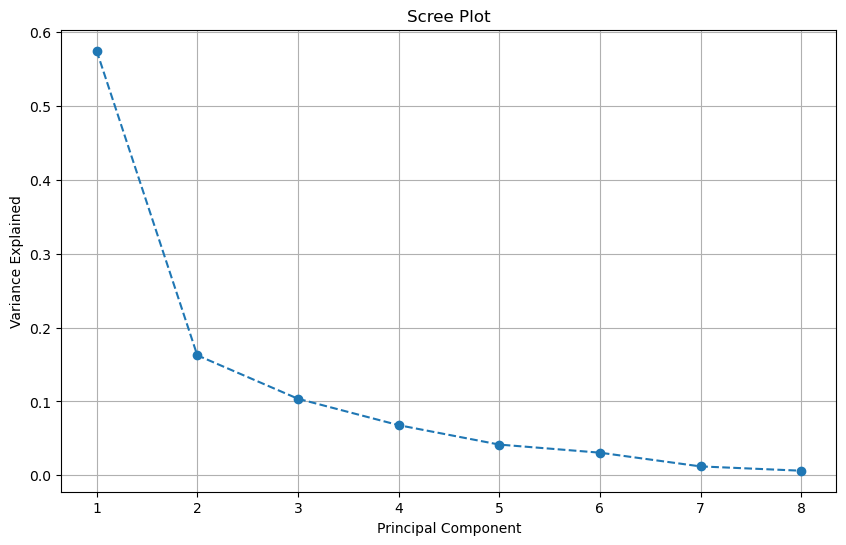

In [8]:
# Create a figure for the Scree Plot with a specified size
plt.figure(figsize=(10, 6))

# Plot the explained variance ratio for each principal component
# The x-axis represents the principal component index, and the y-axis represents the variance explained
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')

# Set the title of the plot
plt.title('Scree Plot')

# Label the x-axis
plt.xlabel('Principal Component')

# Label the y-axis
plt.ylabel('Variance Explained')

# Add a grid to the plot for better readability
plt.grid(True)

# Display the plot
plt.show()


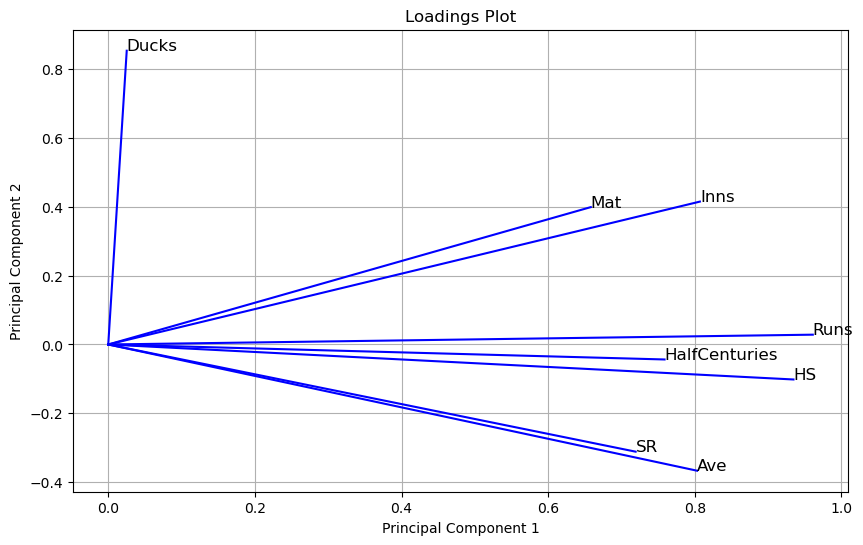

In [9]:
# Loadings Plot
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
num_vars = len(bat_features.columns)
plt.figure(figsize=(10, 6))
for i in range(num_vars):
    plt.plot([0, loadings[i, 0]], [0, loadings[i, 1]], 'b-')
    plt.text(loadings[i, 0], loadings[i, 1], bat_features.columns[i], fontsize=12)

plt.title('Loadings Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

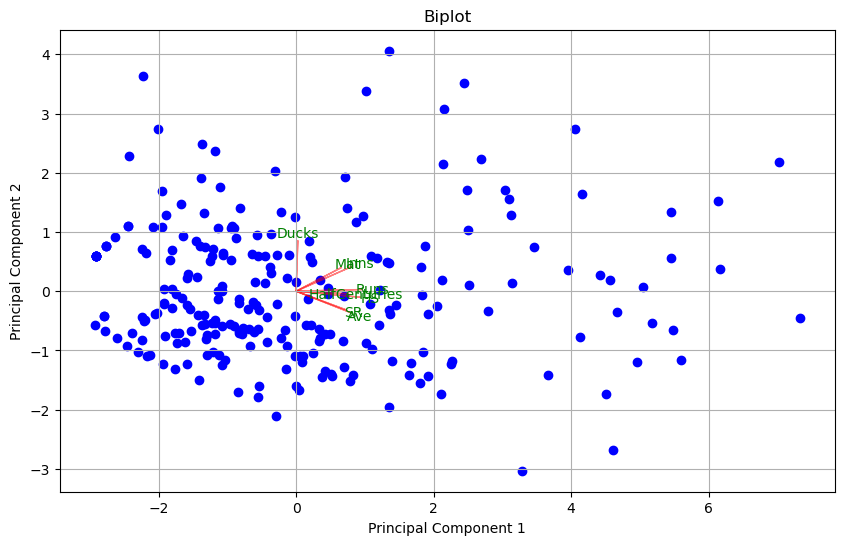

In [10]:
# Biplot
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', marker='o')
plt.title('Biplot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

for i in range(num_vars):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.5)
    plt.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, bat_features.columns[i], color='g', ha='center', va='center')

plt.grid(True)
plt.show()

In [11]:
# Initialize the StandardScaler to standardize features
scaler = StandardScaler()

# Prepare the feature data for scaling by dropping the 'Player' column
bowl_features = norm_bowl.drop('Player', axis=1, inplace=False)

# Apply scaling to the feature data
scaled_bowl_data = scaler.fit_transform(bowl_features)

# Initialize PCA for dimensionality reduction
pca = PCA()

# Apply PCA to the scaled data
pca_result = pca.fit_transform(scaled_bowl_data)

# Retrieve the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Retrieve the component loadings (principal axes in feature space)
component_loadings = pca.components_

# Initialize an array to store the weights for each feature
bowl_weights = np.zeros(bowl_features.shape[1])

# Compute the weight of each feature based on its loadings and explained variance
for i in range(len(explained_variance_ratio)):
    bowl_weights += np.abs(component_loadings[i]) * explained_variance_ratio[i]

# Normalize the weights so that they sum to 1
total_weight = np.sum(bowl_weights)
for i in range(len(bowl_weights)):
    bowl_weights[i] /= total_weight

# Create a DataFrame to display feature weights
bowl_weights = pd.DataFrame({
    'features': bowl_features.columns,
    'weight': bowl_weights.tolist()
})

# Display the DataFrame with feature weights
bowl_weights

,features,weight
0,Mat,0.144657
1,Inns,0.135056
2,Mdns,0.139046
3,Runs,0.148849
4,Wkts,0.156976
5,Ave,0.128598
6,Econ,0.146817


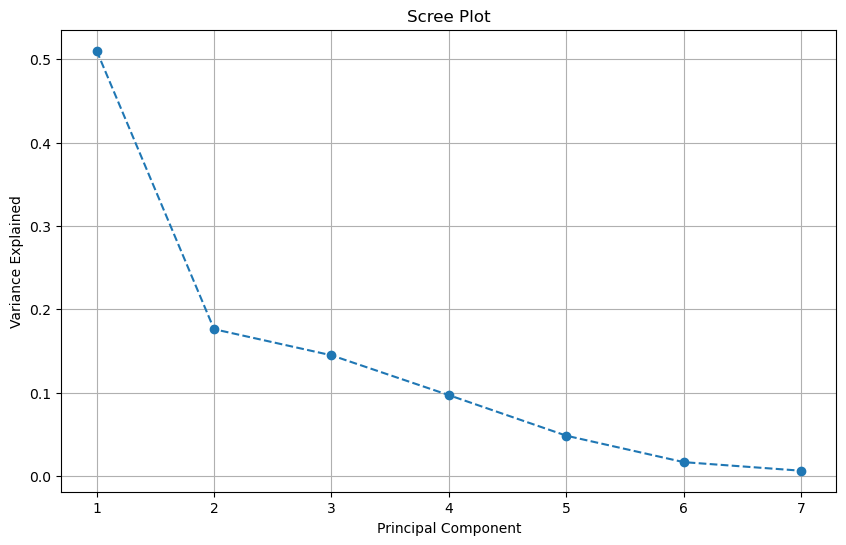

In [12]:
# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()

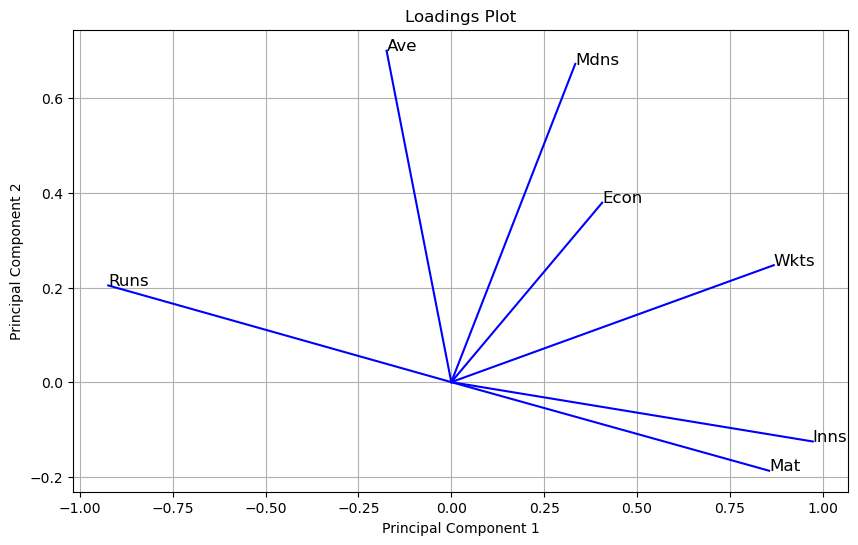

In [13]:
# Loadings Plot
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
num_vars = len(bowl_features.columns)
plt.figure(figsize=(10, 6))
for i in range(num_vars):
    plt.plot([0, loadings[i, 0]], [0, loadings[i, 1]], 'b-')
    plt.text(loadings[i, 0], loadings[i, 1], bowl_features.columns[i], fontsize=12)

plt.title('Loadings Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

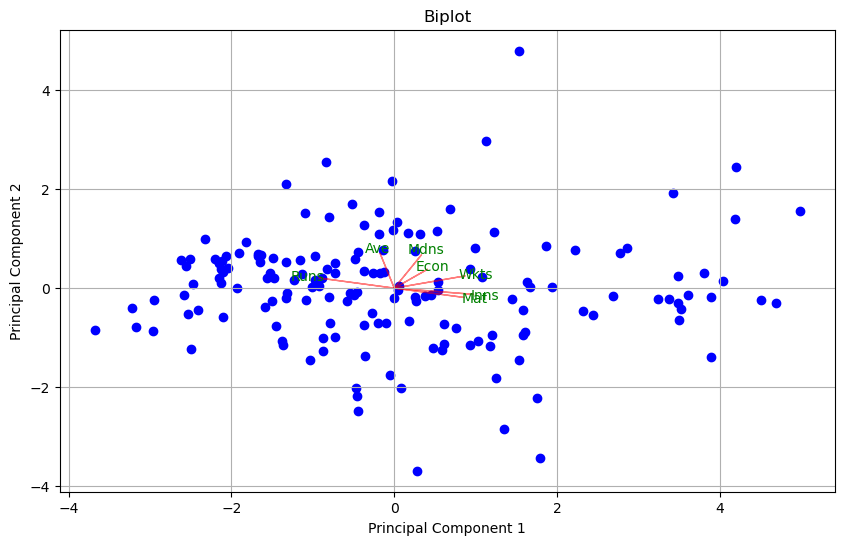

In [14]:
# Biplot
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', marker='o')
plt.title('Biplot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

for i in range(num_vars):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.5)
    plt.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, bowl_features.columns[i], color='g', ha='center', va='center')

plt.grid(True)
plt.show()

In [15]:
# Initialize the StandardScaler to standardize features
scaler = StandardScaler()

# Prepare the feature data for scaling by dropping the 'Player' column
field_features = norm_field.drop('Player', axis=1, inplace=False)

# Apply scaling to the feature data
scaled_field_data = scaler.fit_transform(field_features)

# Initialize PCA for dimensionality reduction
pca = PCA()

# Apply PCA to the scaled data
pca_result = pca.fit_transform(scaled_field_data)

# Retrieve the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Retrieve the component loadings (principal axes in feature space)
component_loadings = pca.components_

# Initialize an array to store the weights for each feature
field_weights = np.zeros(field_features.shape[1])

# Compute the weight of each feature based on its loadings and explained variance
for i in range(len(explained_variance_ratio)):
    field_weights += np.abs(component_loadings[i]) * explained_variance_ratio[i]

# Normalize the weights so that they sum to 1
total_weight = np.sum(field_weights)
for i in range(len(field_weights)):
    field_weights[i] /= total_weight

# Create a DataFrame to display feature weights
field_weights = pd.DataFrame({
    'features': field_features.columns,
    'weight': field_weights.tolist()
})

# Display the DataFrame with feature weights
field_weights


,features,weight
0,Mat,0.192165
1,Inns,0.191708
2,Ct,0.220635
3,Max,0.194356
4,Ct/Inn,0.201136


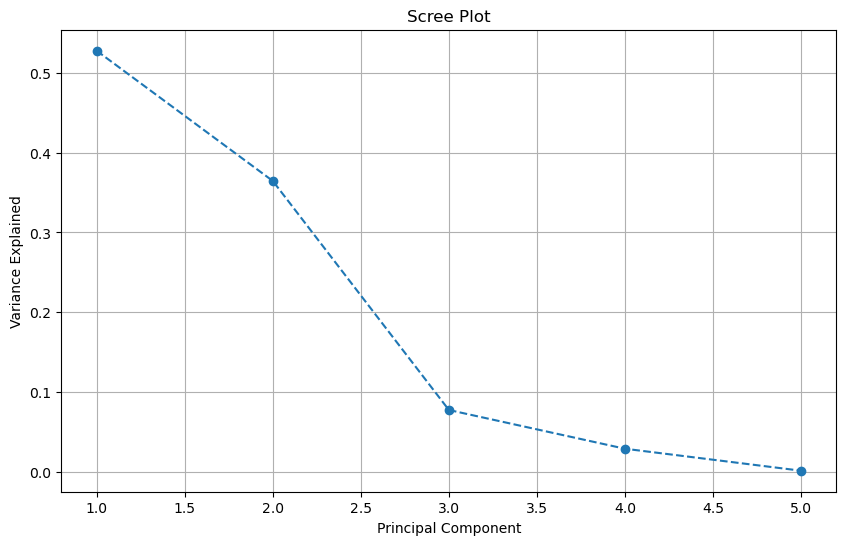

In [16]:
# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()

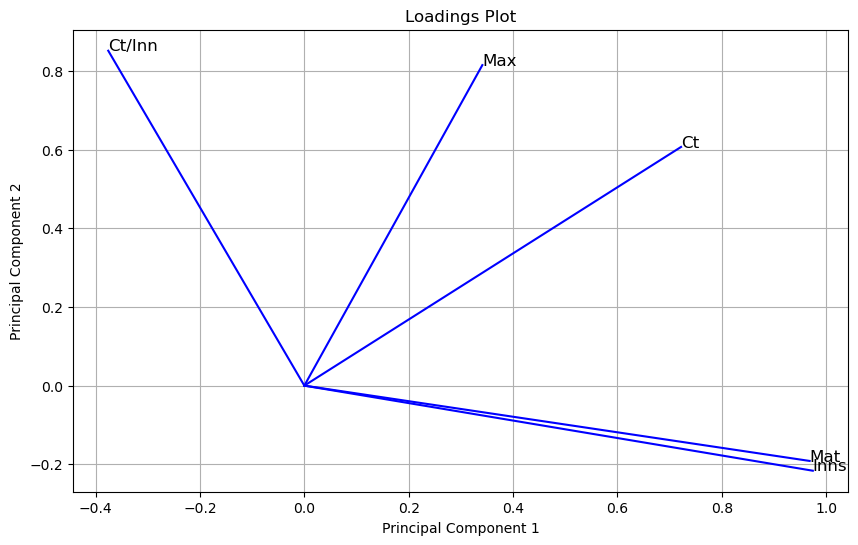

In [17]:
# Loadings Plot
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
num_vars = len(field_features.columns)
plt.figure(figsize=(10, 6))
for i in range(num_vars):
    plt.plot([0, loadings[i, 0]], [0, loadings[i, 1]], 'b-')
    plt.text(loadings[i, 0], loadings[i, 1], field_features.columns[i], fontsize=12)

plt.title('Loadings Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

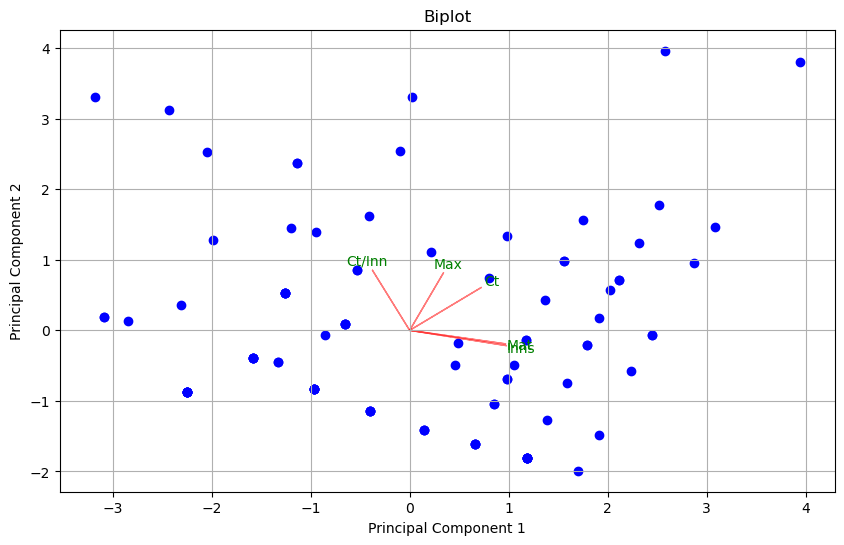

In [18]:
# Biplot
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', marker='o')
plt.title('Biplot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

for i in range(num_vars):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.5)
    plt.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, field_features.columns[i], color='g', ha='center', va='center')

plt.grid(True)
plt.show()

In [19]:
# Initialize the StandardScaler to standardize features
scaler = StandardScaler()

# Prepare the feature data for scaling by dropping the 'Player' column
wik_features = norm_wik.drop('Player', axis=1, inplace=False)

# Apply scaling to the feature data
scaled_wik_data = scaler.fit_transform(wik_features)

# Initialize PCA for dimensionality reduction
pca = PCA()

# Apply PCA to the scaled data
pca_result = pca.fit_transform(scaled_wik_data)

# Retrieve the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Retrieve the component loadings (principal axes in feature space)
component_loadings = pca.components_

# Initialize an array to store the weights for each feature
wik_weights = np.zeros(wik_features.shape[1])

# Compute the weight of each feature based on its loadings and explained variance
for i in range(len(explained_variance_ratio)):
    wik_weights += np.abs(component_loadings[i]) * explained_variance_ratio[i]

# Normalize the weights so that they sum to 1
total_weight = np.sum(wik_weights)
for i in range(len(wik_weights)):
    wik_weights[i] /= total_weight

# Create a DataFrame to display feature weights
wik_weights = pd.DataFrame({
    'features': wik_features.columns,
    'weight': wik_weights.tolist()
})

# Display the DataFrame with feature weights for wicketkeepers
wik_weights

# Display the DataFrame with feature weights for batsmen
bat_weights

,features,weight
0,Mat,0.134207
1,Inns,0.137576
2,Runs,0.120173
3,HS,0.125351
4,Ave,0.135853
5,SR,0.136223
6,HalfCenturies,0.126872
7,Ducks,0.083746


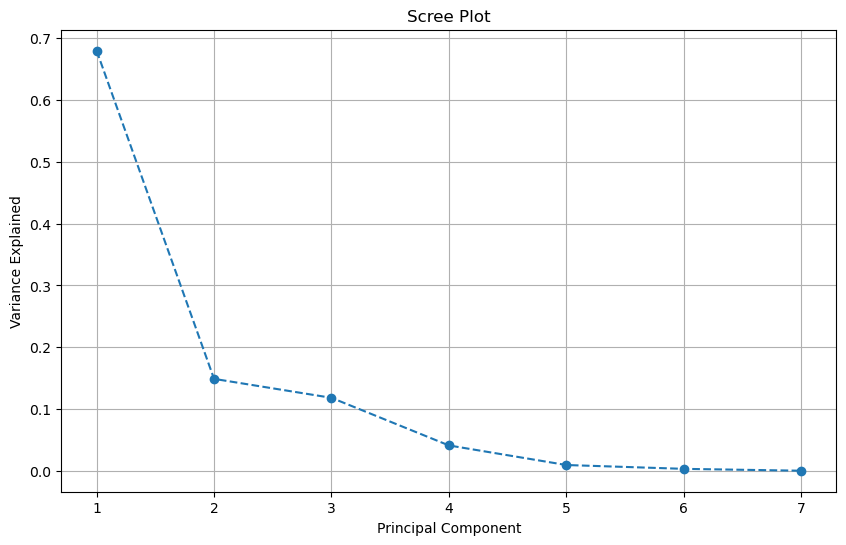

In [20]:
# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()

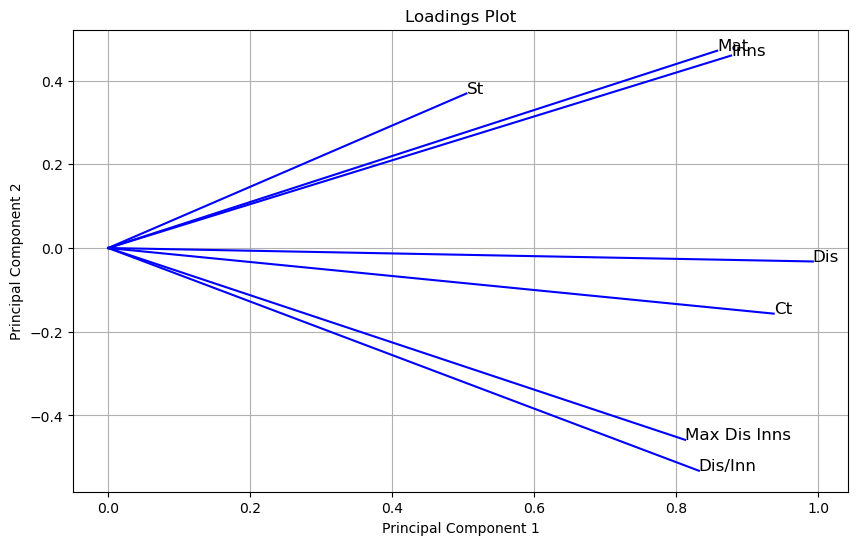

In [21]:
# Loadings Plot
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
num_vars = len(wik_features.columns)
plt.figure(figsize=(10, 6))
for i in range(num_vars):
    plt.plot([0, loadings[i, 0]], [0, loadings[i, 1]], 'b-')
    plt.text(loadings[i, 0], loadings[i, 1], wik_features.columns[i], fontsize=12)

plt.title('Loadings Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

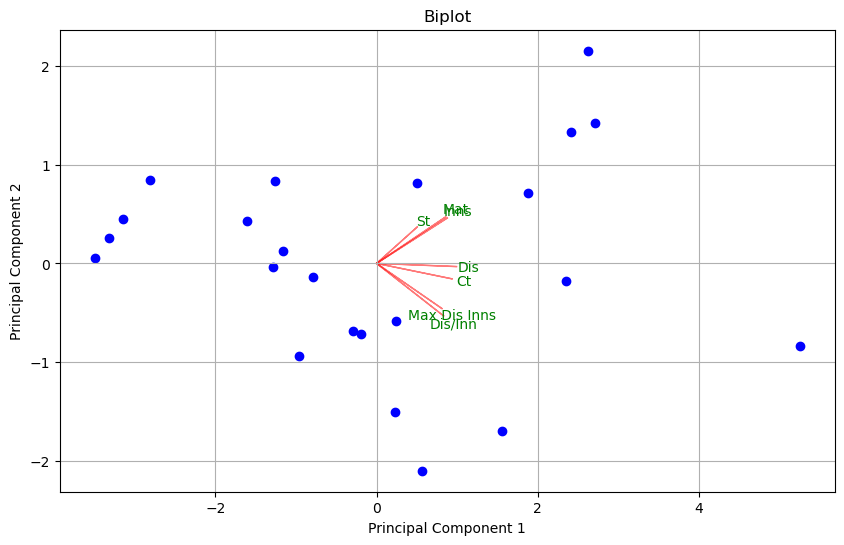

In [22]:
# Biplot
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', marker='o')
plt.title('Biplot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

for i in range(num_vars):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.5)
    plt.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, wik_features.columns[i], color='g', ha='center', va='center')

plt.grid(True)
plt.show()

**Calculate scores using the weights determined by PCA**

In [23]:
# Calculate the 'bat_score' for each player by applying feature weights to normalized batting data
# Multiply each feature by its corresponding weight and sum the results to get the bat_score
norm_bat['bat_score'] = (bat_features * np.array(bat_weights.T.loc['weight',])).sum(axis=1)

# Calculate the 'bowl_score' for each player by applying feature weights to normalized bowling data
# Multiply each feature by its corresponding weight and sum the results to get the bowl_score
norm_bowl['bowl_score'] = (bowl_features * np.array(bowl_weights.T.loc['weight',])).sum(axis=1)

# Calculate the 'field_score' for each player by applying feature weights to normalized fielding data
# Multiply each feature by its corresponding weight and sum the results to get the field_score
norm_field['field_score'] = (field_features * np.array(field_weights.T.loc['weight',])).sum(axis=1)

# Calculate the 'wik_score' for each player by applying feature weights to normalized wicketkeeper data
# Multiply each feature by its corresponding weight and sum the results to get the wik_score
norm_wik['wik_score'] = (wik_features * np.array(wik_weights.T.loc['weight',])).sum(axis=1)


**Rename columns to reduce errors**

In [24]:
# Rename columns of the normalized batting DataFrame to descriptive names
# The new names correspond to the metrics and the calculated 'bat_score'
norm_bat.columns = ['Player', 'bat_Mat', 'bat_Inns', 'bat_Runs', 'HS', 'bat_Ave', 'SR', 'HalfCenturies', 'Ducks', 'bat_score']

# Rename columns of the normalized bowling DataFrame to descriptive names
# The new names correspond to the metrics and the calculated 'bowl_score'
norm_bowl.columns = ['Player', 'bowl_Mat', 'bowl_Inns', 'Mdns', 'bowl_Runs', 'Wkts', 'bowl_Ave', 'Econ', 'bowl_score']

# Rename columns of the normalized fielding DataFrame to descriptive names
# The new names correspond to the metrics and the calculated 'field_score'
norm_field.columns = ['Player', 'field_Mat', 'field_Inns', 'field_Ct', 'Max', 'Ct/Inn', 'field_score']

# Rename columns of the normalized wicketkeeper DataFrame to descriptive names
# The new names correspond to the metrics and the calculated 'wik_score'
norm_wik.columns = ['Player', 'wik_Mat', 'wik_Inns', 'Dis', 'wik_Ct', 'St', 'Max Dis Inns', 'Dis/Inn', 'wik_score']


**Merge Data and fill NaN values**

In [25]:
# Merge the normalized batting, bowling, fielding, and wicketkeeper DataFrames on the 'Player' column
# Use an outer join to include all players, even if they are missing data in some categories
merged_data = pd.merge(norm_bat, norm_bowl, on='Player', how='outer')
merged_data = pd.merge(merged_data, norm_field, on='Player', how='outer')
merged_data = pd.merge(merged_data, norm_wik, on='Player', how='outer')

# Convert the score columns to numeric type to ensure correct calculations and handling
merged_data['bat_score'] = pd.to_numeric(merged_data['bat_score'])
merged_data['bowl_score'] = pd.to_numeric(merged_data['bowl_score'])
merged_data['field_score'] = pd.to_numeric(merged_data['field_score'])
merged_data['wik_score'] = pd.to_numeric(merged_data['wik_score'])

# Replace any missing values in the DataFrame with 0
# This ensures that calculations and analysis do not encounter errors due to NaNs
merged_data.fillna(0, inplace=True)

# Display descriptive statistics of the merged DataFrame
# This provides an overview of the data, including means, standard deviations, and ranges for each column
merged_data.describe()

,bat_Mat,bat_Inns,bat_Runs,HS,bat_Ave,SR,HalfCenturies,Ducks,bat_score,bowl_Mat,...,Ct/Inn,field_score,wik_Mat,wik_Inns,Dis,wik_Ct,St,Max Dis Inns,Dis/Inn,wik_score
count,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,...,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000
mean,0.456604,0.357233,0.163030,0.221525,0.129543,0.331490,0.057862,0.140881,0.239680,0.291405,...,0.118358,0.166815,0.045283,0.043187,0.023989,0.021480,0.014151,0.044025,0.037175,0.033299
std,0.269734,0.236172,0.204526,0.223573,0.138804,0.199429,0.166686,0.207867,0.157581,0.298414,...,0.183152,0.231609,0.164405,0.159639,0.105974,0.098552,0.087244,0.167142,0.148986,0.125155
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.222222,0.014235,0.040816,0.019608,0.193920,0.000000,0.000000,0.134885,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.444444,0.333333,0.078292,0.142857,0.098039,0.360960,0.000000,0.000000,0.212860,0.222222,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.666667,0.444444,0.238434,0.346939,0.192745,0.467280,0.000000,0.333333,0.314964,0.444444,...,0.250000,0.357238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.761310,1.000000,...,1.000000,0.888370,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.871382


**Classify Data**

In [26]:
# Calculate the 75th percentile thresholds for the scores to classify players
wik_score_high = merged_data['wik_score'].quantile(0.75)
bat_score_high = merged_data['bat_score'].quantile(0.75)
bowl_score_high = merged_data['bowl_score'].quantile(0.75)

# Define a function to classify players based on their scores
# The function checks if a player qualifies for a specific role based on score thresholds
def classify_player(row):
    # Check if the player qualifies as a Wicketkeeper
    if row['wik_score'] > wik_score_high:
        return 'Wicketkeeper'
    # Check if the player qualifies as an All-rounder
    elif row['bat_score'] > bat_score_high and row['bowl_score'] > bowl_score_high:
        return 'All_rounder'
    # Check if the player qualifies as a Bowler
    elif row['bowl_score'] > bowl_score_high:
        return 'Bowler'
    # Check if the player qualifies as a Batsman
    elif row['bat_score'] > bat_score_high:
        return 'Batsman'
    else:
        return 'Bad_Player'

# Apply the classification function to each row of the merged DataFrame
# Add a new column 'Role' to store the classification result
merged_data['Role'] = merged_data.apply(classify_player, axis=1)

# Display the first few rows of the DataFrame with the new 'Role' column
merged_data.head()

,Player,bat_Mat,bat_Inns,bat_Runs,HS,bat_Ave,SR,HalfCenturies,Ducks,bat_score,...,field_score,wik_Mat,wik_Inns,Dis,wik_Ct,St,Max Dis Inns,Dis/Inn,wik_score,Role
0,NP Kenjige,0.444444,0.222222,0.003559,0.010204,0.004902,0.10000,0.000000,0.333333,0.134130,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,Bad_Player
1,Aaron Jones,0.666667,0.666667,0.576512,0.959184,0.397059,0.54000,0.333333,0.333333,0.568412,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,Batsman
2,Aasif Sheikh,0.333333,0.333333,0.224199,0.428571,0.205882,0.35492,0.000000,0.000000,0.247577,...,0.000000,0.333333,0.333333,0.142857,0.076923,0.25,0.333333,0.382857,0.266876,Wicketkeeper
3,Abbas Afridi,0.111111,0.111111,0.060498,0.173469,0.166667,0.32380,0.000000,0.000000,0.125964,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,Bad_Player
4,F Achelam,0.111111,0.111111,0.032028,0.091837,0.088235,0.27692,0.000000,0.000000,0.095269,...,0.219389,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,Bad_Player


**Generate the final team**

In [27]:
# Create an empty DataFrame with the same columns as 'merged_data' to store the final team
final_11 = pd.DataFrame(columns=merged_data.columns)

# Select the top player with the highest 'wik_score', 'bat_score', and 'field_score' as the Wicketkeeper
wk = merged_data.sort_values(by=['wik_score', 'bat_score', 'field_score'], ascending=False).head(1)

# Select the top 4 Batsmen based on 'bat_score' and 'field_score'
bm = merged_data[merged_data['Role'] == 'Batsman'].sort_values(by=['bat_score', 'field_score'], ascending=False).head(4)

# Select the top 3 All-rounders based on 'bat_score', 'bowl_score', and 'field_score'
ar = merged_data[merged_data['Role'] == 'All_rounder'].sort_values(by=['bat_score', 'bowl_score', 'field_score'], ascending=False).head(3)

# Select the top 3 Bowlers based on 'bowl_score' and 'field_score'
bw = merged_data[merged_data['Role'] == 'Bowler'].sort_values(by=['bowl_score', 'field_score'], ascending=False).head(3)

# Concatenate the selected players into the 'final_11' DataFrame
final_11 = pd.concat([final_11, wk, bm, ar, bw])

# Reset the index of 'final_11' to ensure a continuous index
final_11.reset_index(drop=True, inplace=True)

# Display the final team selection
final_11

,Player,bat_Mat,bat_Inns,bat_Runs,HS,bat_Ave,SR,HalfCenturies,Ducks,bat_score,...,field_score,wik_Mat,wik_Inns,Dis,wik_Ct,St,Max Dis Inns,Dis/Inn,wik_score,Role
0,RR Pant,0.888889,0.888889,0.608541,0.428571,0.239412,0.51044,0.000000,0.333333,0.498410,...,0.000000,0.888889,0.888889,1.0,1.0,0.25,1.0,1.0,0.871382,Wicketkeeper
1,RG Sharma,0.888889,0.888889,0.914591,0.938776,0.359902,0.62680,1.000000,0.000000,0.730320,...,0.639653,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.000000,Batsman
2,TM Head,0.777778,0.777778,0.907473,0.775510,0.416667,0.63352,0.666667,0.333333,0.673053,...,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.000000,Batsman
3,Ibrahim Zadran,0.888889,0.888889,0.822064,0.714286,0.283039,0.42976,0.666667,0.333333,0.639402,...,0.470110,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.000000,Batsman
4,PD Salt,0.888889,0.777778,0.669039,0.887755,0.368627,0.63728,0.333333,0.000000,0.597161,...,0.591064,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.000000,Batsman
5,MP Stoinis,0.777778,0.555556,0.601423,0.683673,0.414216,0.65628,0.666667,0.000000,0.569042,...,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.000000,All_rounder
6,HH Pandya,0.888889,0.666667,0.512456,0.510204,0.470588,0.60628,0.333333,0.000000,0.525361,...,0.470110,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.000000,All_rounder
7,GJ Maxwell,0.777778,0.666667,0.469751,0.602041,0.258824,0.56772,0.333333,0.333333,0.510722,...,0.786548,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.000000,All_rounder
8,JJ Bumrah,0.888889,0.111111,0.000000,0.000000,0.000000,0.00000,0.000000,0.333333,0.162496,...,0.470110,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.000000,Bowler
9,K Rabada,1.000000,0.333333,0.032028,0.051020,0.044118,0.51428,0.000000,0.333333,0.294275,...,0.596976,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.000000,Bowler
